In [1]:
import numpy as np
import torch

from dataset import Mnist
from model import ClassificationMnist

from random import choice

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import top_k_accuracy_score

from collections import Counter

In [2]:
model = torch.load("mnist50.model")
model.eval()

ClassificationMnist(
  (conv): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): ReLU()
      (5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Sequential(
      (0): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): ReLU()
      (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): BatchNorm2d(128, e

In [3]:
model_ae = torch.load("mnistae100.model")
model_ae.eval()

def call_ae(x):
    x = model_ae.block1(x)
    x = model_ae.max_pool(x)
    x = model_ae.block2(x)
    x = model_ae.max_pool(x)
    x = model_ae.block3(x)
    return x

In [4]:
test_data = Mnist("t10k-images.idx3-ubyte", "t10k-labels.idx1-ubyte")

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=500, num_workers=12
)

In [5]:
data, classes = next(iter(test_loader))

In [6]:
data = data.cuda()
data = data.to(torch.float32)
data /= 255
classes = classes.numpy()

top 1, top 3 and top 5 score

In [10]:
predict = model(call_ae(data)).detach().cpu().numpy()
top_k_accuracy_score(classes, predict, k=1), top_k_accuracy_score(classes, predict, k=3), top_k_accuracy_score(classes, predict, k=5)

(0.968, 0.998, 1.0)

In [12]:
count_classes = 10
each_classes_count = 100 
displayed_classes = np.arange(10)
displayed_classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
id_disp_classes = np.arange(10)

new_data = data[classes == id_disp_classes[0]][:each_classes_count]

for i in id_disp_classes[1:]:
    new_data = torch.cat((new_data, data[classes == i][:each_classes_count]))

data = new_data
data.shape

torch.Size([500, 1, 28, 28])

In [15]:
data = call_ae(data)

In [16]:
data = model.conv(data)
data = data.reshape(-1, 6272)
data = model.fc(data)
data.shape

torch.Size([500, 10])

In [17]:
data = data.detach().cpu().numpy()

In [18]:
data.shape

(500, 10)

In [19]:
pca = PCA(n_components=2)
pca.fit_transform(data)
x = pca.transform(data)

two-dimensional representation of elements

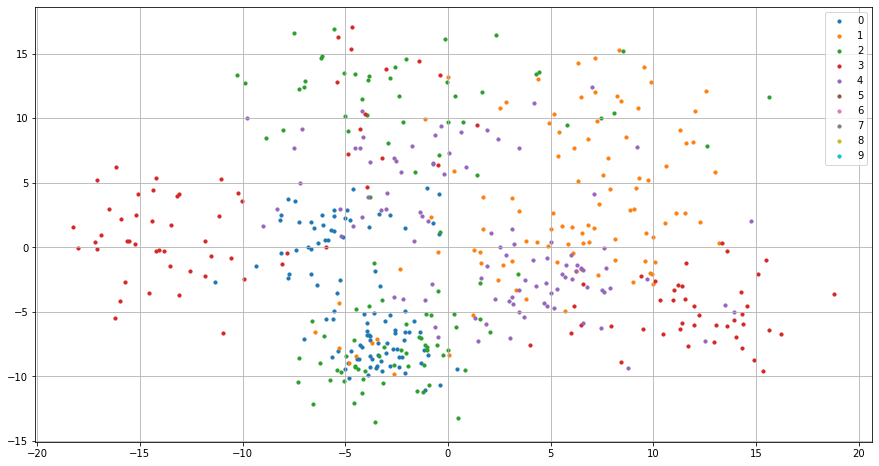

In [20]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot() 

for i, id in enumerate(id_disp_classes):
    j = x[i * each_classes_count: (i + 1) * each_classes_count]
    ax.scatter(j[:, 0], j[:, 1], s=10)

ax.legend(displayed_classes)

ax.grid()